# Fashion Mnist
# Isaí Ambrocio - A01625101

> Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

> Preparing Fashion Mnist dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


> Normalize pixel values

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255

> Data Validation & ploting images and labels

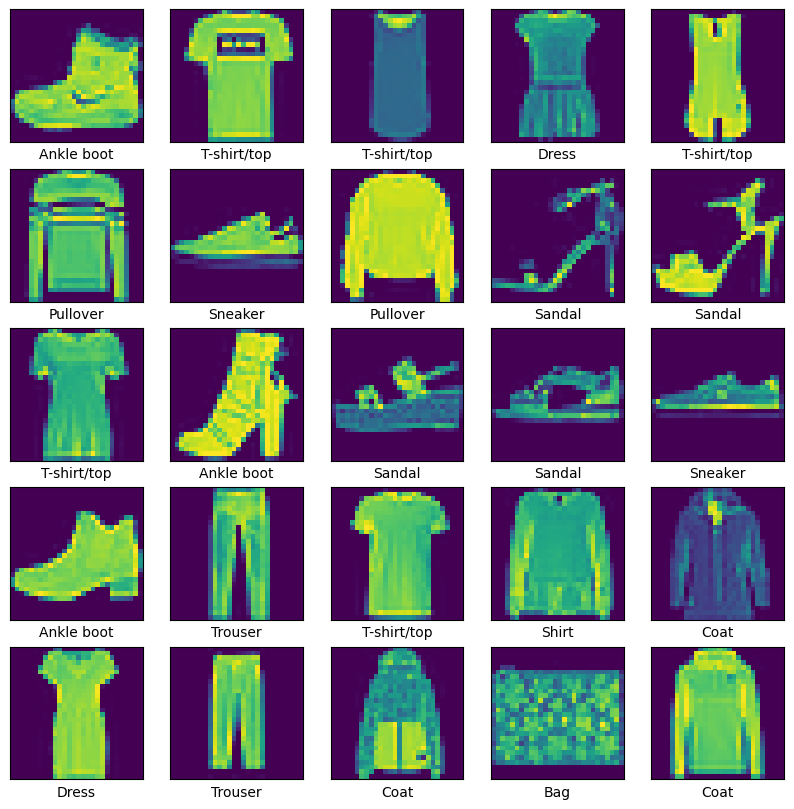

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize = (10, 10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

> Configuring Layers

In [27]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu")),
model.add(layers.Dense(128, activation = "sigmoid"))

> Training

In [29]:
model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ["accuracy"])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 6s 3ms/step - loss: 0.5690 - accuracy: 0.8103 - val_loss: 0.4551 - val_accuracy: 0.8374
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4069 - accuracy: 0.8553 - val_loss: 0.4162 - val_accuracy: 0.8515
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3653 - accuracy: 0.8694 - val_loss: 0.3984 - val_accuracy: 0.8559
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3393 - accuracy: 0.8770 - val_loss: 0.3746 - val_accuracy: 0.8652
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3203 - accuracy: 0.8832 - val_loss: 0.3829 - val_accuracy: 0.8639
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3081 - accuracy: 0.8864 - val_loss: 0.3609 - val_accuracy: 0.8668
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2928 - accuracy: 0.8924 - val_loss: 0.3488 - val_accuracy: 0.8775
Epo

In [30]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
Total params: 58560 (228.75 KB)
Trainable params: 58560 (228.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


> Evaluation

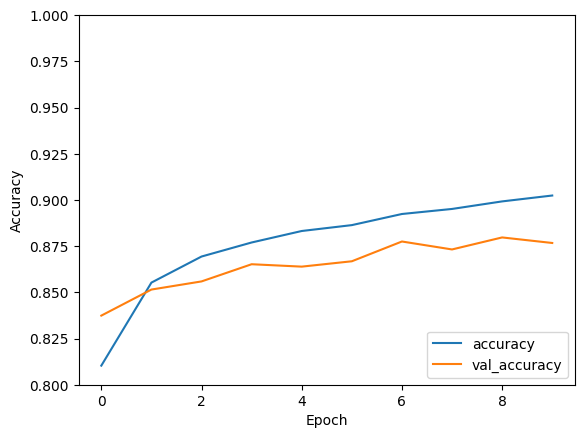

In [32]:
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.8, 1])
plt.legend(loc = "lower right")

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3455 - accuracy: 0.8767 - 973ms/epoch - 3ms/step


> Accuracy test

In [34]:
print(test_acc)

0.8766999840736389


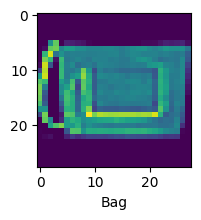

In [36]:
n = 220 # Numero de imagen

plt.figure(figsize=(2, 2))
plt.imshow(test_images[n])
plt.xlabel(class_names[test_labels[n]])
plt.show()

In [37]:
predictions = model.predict(test_images)
print(predictions[n])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions[n])], 10 * np.max(predictions[n]))
)


313/313 [==============================] - 1s 2ms/step
[6.5972105e-02 4.2391606e-05 8.0494338e-04 1.6842708e-06 1.0126979e-03
 4.5273378e-03 4.7756676e-02 2.4496231e-04 9.9991256e-01 1.4497159e-07
 1.6561316e-18 7.0824739e-21 2.9039970e-18 1.1920111e-19 9.7390113e-20
 2.7751586e-19 2.6956222e-18 1.1911118e-18 1.0972277e-19 7.8880088e-19
 1.1515528e-19 3.0233675e-18 1.9347817e-18 5.7144930e-19 6.9554593e-20
 8.9837786e-20 3.1769324e-19 2.6509265e-18 5.5234191e-20 2.7314683e-18
 4.6906389e-18 8.4078318e-19 1.4260846e-19 1.5853880e-18 4.9601999e-19
 2.7957940e-19 2.8790344e-19 2.0381106e-18 3.9191288e-19 2.1520415e-18
 1.0524358e-19 1.4046884e-18 1.8816025e-19 3.7896055e-19 9.4602858e-19
 1.1146430e-18 2.8392009e-21 3.7482730e-18 6.0283411e-20 1.5137799e-19
 2.4460718e-19 2.1507529e-18 8.7732598e-20 2.2852053e-19 6.3617137e-19
 4.6009998e-19 2.8991020e-20 1.4166935e-19 1.7212677e-21 4.4070359e-18
 1.4916142e-18 5.8846527e-20 1.4127160e-19 4.5198141e-18 6.9772540e-19
 8.7738334e-19 5.27098